In [242]:
# install these libraries before proceeding
# !pip3 install numpy
# !pip3 install pandas
# !pip3 install wordcloud
# !pip3 install nltk
# !pip3 install matplotlib
# !pip3 install nltk

In [264]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from math import pi
from PIL import Image, ImageOps
import random


from IPython.core.display import display, HTML
from collections import Counter
from collections import OrderedDict
import re
import os
import datetime

In [27]:
# download english stopwords
#nltk.download('stopwords')

In [28]:
def isNewMessage(line):
  NewLinePattern = "(\d+\/\d+\/\d+)(,)(\s)(\d+(:)\d+)(\s)(\w+)(\s)(-)(\s)(\w+)"
  if re.match(NewLinePattern,line):
    return True
  return False 

In [29]:
def standardizeDate(str):
  return str.split('/')[2] + "-" + str.split('/')[1] + "-" + str.split('/')[0] 

In [30]:
def standardizeTime(time):
  time = time.strip()
  if "pm" or "am" in time:
    if "am" in time:
      time = time.split(' ')[0]
      if len(time) == 4:
        time = "0" + time
      return time
    if "pm" in time:
      time = time.split(' ')[0]
      time = str(int(time.split(':')[0]) + 12) + ":" + time.split(':')[1]
      return time
  return time

In [31]:
def splitData(line):
  if isNewMessage(line):
    date = line.split(',')[0]
    date = standardizeDate(date)
    time = line.split(',')[1].split('-')[0]
    time = standardizeTime(time)
    author = line.split('-')[1].split(':')[0]
    author = author.strip()
    message = line.split(':')[2:]
    message = ''.join(map(str,message))
    message = message.strip()
    return date, time, author, message
  else:
    message = line
    return message

In [32]:
parsedData= []

#input file location
textFile = '/Users/Rachel/Downloads/WhatsApp_Chat.txt'

In [33]:
with open(textFile, encoding ="utf-8") as fp:
  fp.readline() #skips first line which contains end-end encryption info
  date, time, author, message, hour = None, None, None, None, None # initialise variables
  while True:
    line = fp.readline()
    if not line: #if the end of the file has been reached
      parsedData.append([date, time, author, message, hour])
      break 
    line = line.strip() #removes leading and trailing whitespace
    if isNewMessage(line):
      if message:
        message = str(message)
      parsedData.append([date, time, author, message, hour])
      date, time, author, message = splitData(line)
      hour =  time.split(':')[0]
    else: 
      message += " " 
      message += splitData(line)

In [34]:
# initializing a pandas framework:
df = pd.DataFrame(parsedData, columns = ['Date', 'Time', 'Author', 'Message', 'Hour'])
df = df.drop(df.index[0])

In [35]:
#restricting range of data
#startDate = ''' start date input'''
#endDate = ''' end date input'''
#mask = (df['Date'] >= startDate) & (df['Date']<= endDate)
#df = df.loc[mask]

In [245]:
authors = df['Author'].unique()
author1 = authors[0]
author2 = authors[1]
print (authors)

#input desired name with respect to order below
author1_name = "Rachel"
author2_name = "Nicole"


#df.head()

['Raychur 🐺💞' 'Naeko D Chiobu 💙💦🦈🦈🦈']


In [247]:
#separate df for media only
media_messages_df = df[df['Message'] == '<Media omitted>']

#to drop the media files
df= df.drop(media_messages_df.index)

In [248]:
#to remove all system messages
df = df.loc[(df['Author'] == author1)|(df['Author'] == author2)]

author_value_counts = df['Author'].value_counts()
print(author_value_counts)

Naeko D Chiobu 💙💦🦈🦈🦈    11178
Raychur 🐺💞               9890
Name: Author, dtype: int64


In [249]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_week'] = df['Date'].dt.day_name()
#df.head()

In [40]:
author1_df =  df.loc[(df['Author'] == author1)]
author2_df =  df.loc[(df['Author'] == author2)]
author1_hour = author1_df['Hour'].value_counts()
author2_hour = author2_df['Hour'].value_counts()

In [250]:
def time_of_day_data():
  hours_dictionary = {}
  hours_dictionary['hourlist'] = ['Author 1', 'Author 2']
  for i in range(0,24):
    t_list = [0,0]
    j = str(i)
    if i<10:
      j = '0' + j
    if i == 0:
      j = '24'
    if j in author1_hour.index.tolist():
        t_list[0] = author1_hour.loc[j].item()
    if j in author2_hour.index.tolist():
        t_list[1] = author2_hour.loc[j].item()
    if i == 0:
      j = '00'
    hours_dictionary[j] = t_list
  return hours_dictionary

#time_of_day_data()

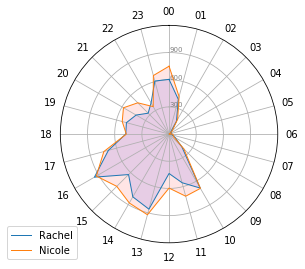

In [161]:
def plot_time_of_day():
  time_of_day_df = pd.DataFrame(time_of_day_data())
# number of variable
  categories=list(time_of_day_df)[1:]
  N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
  angles = [n / float(N) * 2 * pi for n in range(N)]
  angles += angles[:1]
  
# Initialise the spider plot
  ax = plt.subplot(111, polar=True)

 
# If you want the first axis to be on top:
  ax.set_theta_offset(pi / 2)
  ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
  plt.xticks(angles[:-1], categories)
 
# Draw ylabels
  ax.set_rlabel_position(0)
  plt.yticks([300,600,900], ["300","600","900"], color="grey", size=7)
  plt.ylim(0,1200)
    
# Ind1
  values=time_of_day_df.loc[0].drop('hourlist').values.flatten().tolist()
  values += values[:1]
  ax.plot(angles, values, linewidth=1, linestyle='solid', label=author1_name)
  ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
  values=time_of_day_df.loc[1].drop('hourlist').values.flatten().tolist()
  values += values[:1]
  ax.plot(angles, values, linewidth=1, linestyle='solid', label=author2_name)
  ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
  plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
  plt.savefig('timeofday.png', bbox_inches = 'tight')  

plot_time_of_day()

In [251]:
author1_day = author1_df['Day_of_week'].value_counts()
author2_day = author2_df['Day_of_week'].value_counts()

In [45]:
days_in_order = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [252]:
def day_of_week_data():
  day_dictionary = {}
  day_dictionary['Day'] = ['Author 1', 'Author 2']
  for dayname in days_in_order:
    t_list = [0,0]
    if dayname in author1_day.index.tolist():
        t_list[0] = author1_day.loc[dayname].item()
    if dayname in author2_day.index.tolist():
        t_list[1] = author2_day.loc[dayname].item()
    day_dictionary[dayname] = t_list
  return day_dictionary

#day_of_week_data()

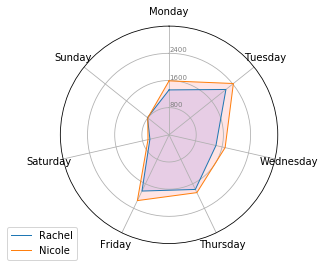

In [237]:
def plot_day_of_week():
  day_of_week_df = pd.DataFrame(day_of_week_data())
# number of variable
  categories=list(day_of_week_df)[1:]
  N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
  angles = [n / float(N) * 2 * pi for n in range(N)]
  angles += angles[:1]

# Initialise the spider plot
  ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
  ax.set_theta_offset(pi / 2)
  ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
  plt.xticks(angles[:-1], categories)
 
# Draw ylabels
  ax.set_rlabel_position(0)
  plt.yticks([800,1600,2400], ["800","1600","2400"], color="grey", size=7)
  plt.ylim(0,3200)
    
# Ind1
  values=day_of_week_df.loc[0].drop('Day').values.flatten().tolist()
  values += values[:1]
  ax.plot(angles, values, linewidth=1, linestyle='solid', label=author1_name)
  ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
  values=day_of_week_df.loc[1].drop('Day').values.flatten().tolist()
  values += values[:1]
  ax.plot(angles, values, linewidth=1, linestyle='solid', label=author2_name)
  ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
  plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
  plt.savefig('dayofweek.png', bbox_inches = 'tight')  

plot_day_of_week()

In [253]:
def timeline_data():
  timeline_dictionary = {}
  timeline_dictionary['date'] = ['Author 1', 'Author 2']
  for i in range(len(df)):
    t_list = [0,0]
    day,author = df.iloc[i,0], df.iloc[i,2]
    if day not in timeline_dictionary:
      timeline_dictionary[day] = t_list  
    t_list = timeline_dictionary[day]
    if author == author1:
        t_list[0] += 1
    if author == author2:
        t_list[1] += 1
    timeline_dictionary[day] = t_list
  return timeline_dictionary

In [258]:
#timeline 2 plots timeline with cumulative message count

def timeline_data_2():
  timeline_dictionary_2 = {}
  timeline_dictionary_2['date'] = ['Author 1', 'Author 2']
  t_list = [0,0]
  for i in range(len(df)):
    day,author = df.iloc[i,0], df.iloc[i,2]
    if day not in timeline_dictionary_2:
      timeline_dictionary_2[day] = t_list  
    if author == author1:
      t_list[0] += 1
    if author == author2:
      t_list[1] += 1
    tt_list = t_list.copy()
    timeline_dictionary_2[day] = tt_list
  return timeline_dictionary_2

timeline_df_2 = pd.DataFrame(timeline_data_2())
#timeline_df_2.head()

In [256]:
timeline_df_2 = timeline_df_2.T
new_header = timeline_df_2.iloc[0]
timeline_df_2 = timeline_df_2[1:]
timeline_df_2.columns = new_header

#timeline_df_2.head()

In [257]:
def plot_timeline_2():
  timeline_df_2.plot(figsize = (20,8))

#plot_timeline_2()

In [259]:
timeline_df = pd.DataFrame(timeline_data())
timeline_df = timeline_df.T
new_header = timeline_df.iloc[0]
timeline_df = timeline_df[1:]
timeline_df.columns = new_header

#timeline_df.head()

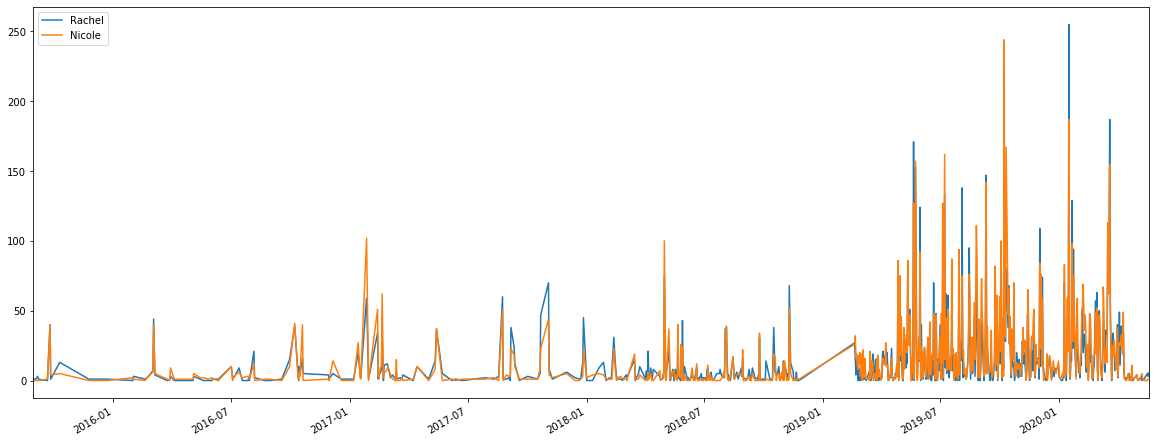

In [219]:
def plot_timeline():
  ax = timeline_df.plot(figsize = (20,8))
  ax.legend([author1_name,author2_name],loc='upper left')
  plt.savefig('timeline.png', bbox_inches = 'tight')  

plot_timeline()

In [260]:
def top_words(df): 
  top_N = 40

  stopwords = nltk.corpus.stopwords.words('english')
  # RegEx for stopwords
  RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
  #RE_stopwords.extend(['from', 'subject', 're', 'edu', 'use'])
  # replace '|'-->' ' and drop all stopwords
  words = (df.Message
             .str.lower()
             .replace([RE_stopwords], [''], regex=True)
             .str.cat(sep=' ')
             .split()
  )

  words = [word for word in words if len(word) > 3]

# generate DF out of Counter
  rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    
  return rslt

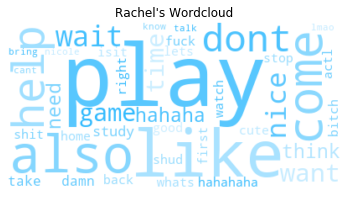

In [262]:
df_1 = top_words(author1_df)
df_1.columns
d = dict(zip(df_1.index, df_1.Frequency))


wordcloud = WordCloud(background_color = "white")
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.title(author1_name + '\'s Wordcloud')

def blue_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(200, 99%%, %d%%)" % random.randint(60, 90)

plt.imshow(wordcloud.recolor(color_func = blue_color_func), interpolation="bilinear")
plt.axis("off")
#plt.show()
wordcloud.to_file('author1cloud.png')  

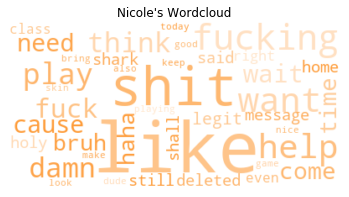

In [261]:
df_2 = top_words(author2_df)
df_2.columns
d = dict(zip(df_2.index, df_2.Frequency))


wordcloud = WordCloud(background_color = "white")
wordcloud.generate_from_frequencies(frequencies=d)
plt.figure()
plt.title(author2_name + '\'s Wordcloud')

def orange_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(30, 99%%, %d%%)" % random.randint(60, 90)


plt.imshow(wordcloud.recolor(color_func = orange_color_func), interpolation="bilinear")
plt.axis("off")
#plt.show()
wordcloud.to_file('author2cloud.png')

In [268]:
timeline = Image.open('timeline.png')
timeofday = Image.open('timeofday.png')
dayofweek = Image.open('dayofweek.png')
author1cloud = Image.open('author1cloud.png')
author2cloud = Image.open('author2cloud.png')

author1cloud = ImageOps.expand(author1cloud,border=50,fill='white')
author2cloud = ImageOps.expand(author2cloud,border=50,fill='white')

def get_concat_h_resize(im1, im2, resample=Image.BICUBIC, resize_big_image=True):
    if im1.height == im2.height:
        _im1 = im1
        _im2 = im2
    elif (((im1.height > im2.height) and resize_big_image) or
          ((im1.height < im2.height) and not resize_big_image)):
        _im1 = im1.resize((int(im1.width * im2.height / im1.height), im2.height), resample=resample)
        _im2 = im2
    else:
        _im1 = im1
        _im2 = im2.resize((int(im2.width * im1.height / im2.height), im1.height), resample=resample)
    dst = Image.new('RGB', (_im1.width + _im2.width, _im1.height))
    dst.paste(_im1, (0, 0))
    dst.paste(_im2, (_im1.width, 0))
    return dst

def get_concat_v_resize(im1, im2, resample=Image.BICUBIC, resize_big_image=True):
    if im1.width == im2.width:
        _im1 = im1
        _im2 = im2
    elif (((im1.width > im2.width) and resize_big_image) or
          ((im1.width < im2.width) and not resize_big_image)):
        _im1 = im1.resize((im2.width, int(im1.height * im2.width / im1.width)), resample=resample)
        _im2 = im2
    else:
        _im1 = im1
        _im2 = im2.resize((im1.width, int(im2.height * im1.width / im2.width)), resample=resample)
    dst = Image.new('RGB', (_im1.width, _im1.height + _im2.height))
    dst.paste(_im1, (0, 0))
    dst.paste(_im2, (0, _im1.height))
    return dst

def get_concat_v_blank(im1, im2, color=(0, 0, 0)):
    dst = Image.new('RGB', (max(im1.width, im2.width), im1.height + im2.height), color)
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    return dst


get_concat_v_resize(timeline,
                    get_concat_h_resize(get_concat_v_resize(timeofday, dayofweek), 
                                        get_concat_v_resize(author1cloud, author2cloud), resize_big_image=True), resize_big_image=False).save('ChatAnalyzer.png')

os.remove('timeline.png')
os.remove('timeofday.png')
os.remove('dayofweek.png')
os.remove('author1cloud.png')
os.remove('author2cloud.png')

FileNotFoundError: [Errno 2] No such file or directory: 'timeline.png'